In [201]:
import pandas as pd
import numpy as np
import datetime
import os
import re
import matplotlib.pyplot as plt

In [153]:
dir = "./../data/mock study/"
files = os.listdir(dir)
files_needed = []

In [154]:
for file in files:
    if 'sensor' in file:
        files_needed.append(file)
files_needed = sorted(files_needed)

In [155]:
# read all files and add them to one dataframe
data_list = []
for file in files_needed:
    data = pd.read_json("./../data/mock study/"+file)
    data_list.append(data)
data = pd.concat(data_list)

In [157]:
# read time 
# participant data
pData = pd.read_csv("./../data/participant.txt")

In [181]:
# Given the input data, select certain period of data using start time and end time
def selectPeriod(start, end, input):
    start = pd.to_datetime(start, format="%d/%m/%Y %H:%M:%S%z")
    end = pd.to_datetime(end, format="%d/%m/%Y %H:%M:%S%z")
    return input[(input['timestamp'] > start) & (input['timestamp'] <= end)].copy()

In [183]:
# create patient data by cropping time
data_list = []
for i in range(pData.shape[0]):
    startTime = pData.iloc[i, 0]
    endTime = pData.iloc[i, 1]
    newData = selectPeriod(startTime, endTime, data)
    newData['ActivityNumber'] = pData.iloc[i, 2]
    data_list.append(newData)
# selected participant data
patData = pd.concat(data_list)

In [214]:
def draw_plot(activity):
    x = patData.query("ActivityNumber == %d"%activity)['accelX']
    y = patData.query("ActivityNumber == %d"%activity)['accelY']
    z = patData.query("ActivityNumber == %d"%activity)['accelZ']
    
    index = [i for i in range(len(x))]
    
    plt.plot(index, x, 'r-', label='X')
    plt.plot(index, y, 'b-', label='Y')
    plt.plot(index, z, 'g-', label='Z')

    plt.title('Accelerometer data for Activity #%d'%activity)
    plt.xlabel('index')
    plt.ylabel('Accel')
    
    plt.legend()

    plt.show()

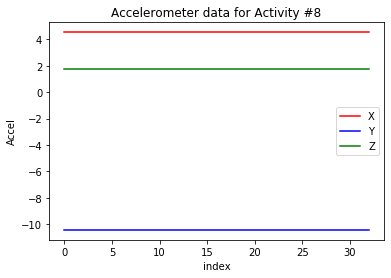

In [216]:
draw_plot(8)

In [93]:

def cropData(year, month, day, hour, minute, second, watchID):
    start = pd.Timestamp(year = year,
                         month = month,
                         day = day,
                         hour = hour,
                         minute = minute,
                         second = second, tz="US/Eastern")
    
    end = start + pd.Timedelta(seconds=15)
    print(start)
    print(end)
    retval = data.loc[(data.timestamp >= start) & (data.timestamp<=end) & (data.watchID == watchID)].copy()
    return retval

In [94]:
test = cropData(2020, 7, 13, 1, 24, 15, "D98B")
#start = datetime.datetime(2020, 7, 13, 1, 24, 15)
#end = start + datetime.timedelta(seconds = 15)
#startT = pd.Timestamp(start)

2020-07-13 01:24:15-04:00
2020-07-13 01:24:30-04:00


In [97]:
test.head(30)

,id,watchID,timestamp,accelX,accelY,accelZ
14088,14089,D98B,2020-07-13 01:24:15.580000-04:00,0.007178,-0.086142,9.911072
14089,14090,D98B,2020-07-13 01:24:15.161000-04:00,0.028714,-0.090927,9.906286
14090,14091,D98B,2020-07-13 01:24:15.258000-04:00,0.023928,-0.040678,9.906286
14091,14092,D98B,2020-07-13 01:24:15.402000-04:00,0.002393,-0.031107,9.875179
14092,14093,D98B,2020-07-13 01:24:15.457000-04:00,0.002393,-0.031107,9.875179
14093,14094,D98B,2020-07-13 01:24:15.561000-04:00,-0.023928,-0.071785,9.848858
14094,14095,D98B,2020-07-13 01:24:15.671000-04:00,0.011964,-0.059821,9.908678
14095,14096,D98B,2020-07-13 01:24:15.757000-04:00,-0.031107,-0.043071,9.889536
14096,14097,D98B,2020-07-13 01:24:15.859000-04:00,-0.002393,-0.086142,9.918249
14097,14098,D98B,2020-07-13 01:24:15.971000-04:00,-0.047856,-0.050249,9.877571
